In [1]:
## AHRI Standard 340/360-2022-(I-P) - Table 6. Conditions for Standard Rating and Operating Tests
    # Cooling-Standard Rating Conditions Cooling 
    #    - Indoor Section - Air Entering: Dry bulb - 80F; Wet bulb - 67F
    #    - Outdoor Section - Condenser Type = Air Cooled/Evaporative: Dry bulb - 95F; Wet bulb - 75F

## ANSI/AHRI Standard 550/590-2023 (I-P) - Table 4. Standard Rating Conditions
    # All Cooling - Cooling Mode Evaporator - Air Entering: Dry bulb - 54F; Wet bulb - 44F (only this make sense to me)
    # 54F = 12.222C; 44F = 6.6667C

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### all functions to use

def c_to_f(celsius):
    return celsius * 9/5 + 32
    
def draw_hist(ax, df, col, filter_col, bins = 20, site = '', std = 0):

    # Plot a histogram with specified bins
    ax.hist(df[df[filter_col] != 0][col], bins=bins, edgecolor='black', alpha=0.7)
    if std != 0:
        ax.axvline(x=std, color='red', linestyle='--', label='Threshold')
    # Add labels and title
    ax.set_title(site+' '+col)
    ax.set_xlabel('temperatures')
    ax.set_ylabel('Frequency')

In [3]:
building_type = 'Hospital'
city = 'NewYork'
path = './chiller_data/ASHRAE901_' + building_type + '_STD2022_' + city + '.csv'
print(path)

./chiller_data/ASHRAE901_Hospital_STD2022_NewYork.csv


# Hospital

In [5]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'hr_chiller_evap_temp_outlet', 'hr_chiller_mass_flow_rate','hr_chiller_evap_temp_inlet',
                 'chiller1_evap_temp_outlet', 'chiller1_mass_flow_rate','chiller1_evap_temp_inlet',
                 'chiller2_evap_temp_outlet', 'chiller2_mass_flow_rate','chiller2_evap_temp_inlet']
    selected_columns = [col for col in dfs[i].columns if col.endswith('let')]
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)


In [11]:
chillers = ['chiller1','chiller2']
cols = []
filter_cols = []
for chiller in chillers:
    cols.append(chiller+'_evap_temp_outlet')
    cols.append(chiller+'_evap_temp_inlet')
    std_temp = [6.7, 21]
    filter_cols.append(chiller+'_mass_flow_rate')

num_plots = len(chillers) * 2 * len(dfs)
num_cols = len(chillers) * 2
num_rows = len(dfs)
chillers = ['chiller1','chiller2']
sites = ['NYC','SEA','TPA']
std_temp = [44,85]


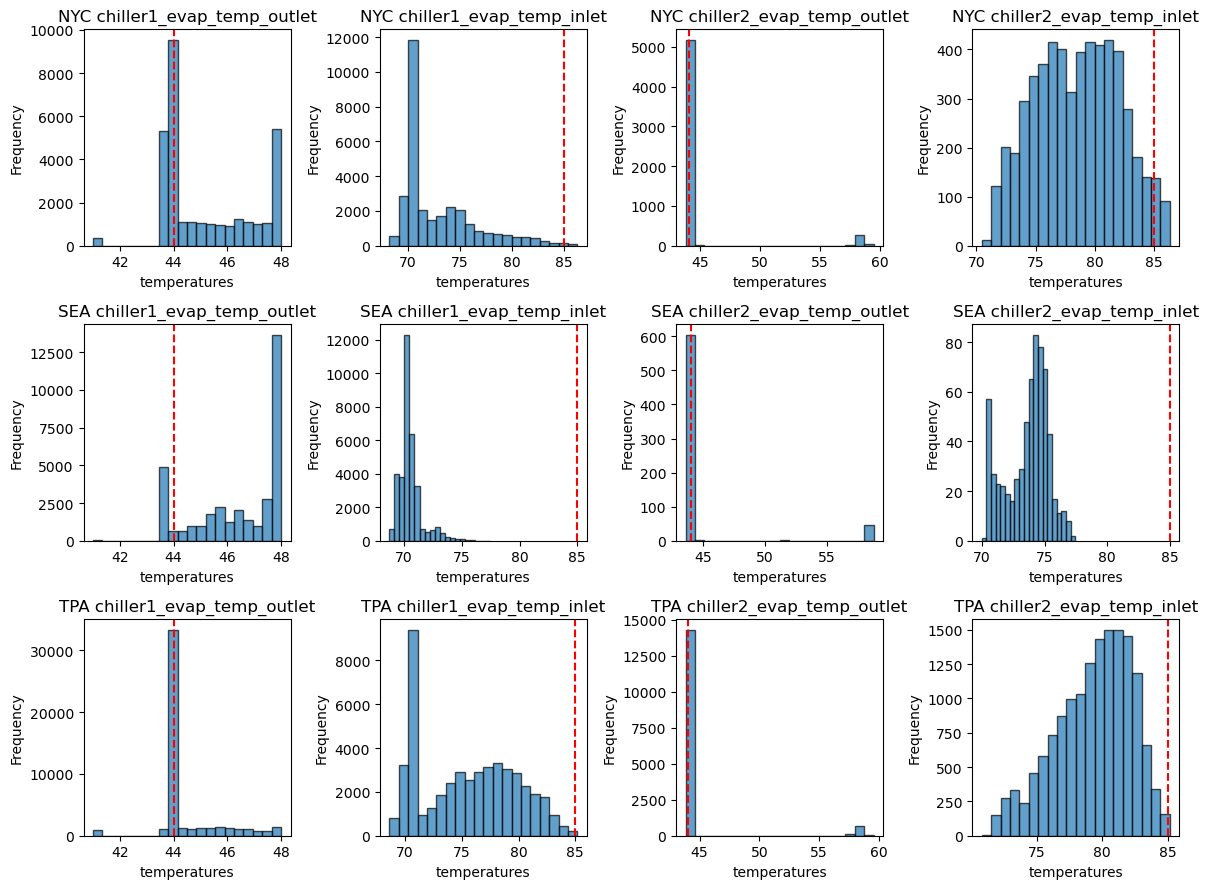

In [12]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    for j, chiller in enumerate(chillers):
        cols = [chiller+'_evap_temp_outlet', chiller+'_evap_temp_inlet']
        filter_col = chiller+'_mass_flow_rate'
        for k, col in enumerate(cols):
            ax = axes[i, j * 2 + k]  # Adjust indexing to access the correct subplot
            draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# OfficeLarge

In [14]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_OfficeLarge_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_OfficeLarge_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_OfficeLarge_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'chiller1_evap_temp_outlet', 'chiller1_mass_flow_rate','chiller1_evap_temp_inlet',
                 'chiller2_evap_temp_outlet', 'chiller2_mass_flow_rate','chiller2_evap_temp_inlet']
    selected_columns = [col for col in dfs[i].columns if col.endswith('let')]
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)

In [15]:
chillers = ['chiller1','chiller2']
cols = []
filter_cols = []
for chiller in chillers:
    cols.append(chiller+'_evap_temp_outlet')
    cols.append(chiller+'_evap_temp_inlet')
    std_temp = [6.7, 21]
    filter_cols.append(chiller+'_mass_flow_rate')

num_plots = len(chillers) * 2 * len(dfs)
num_cols = len(chillers) * 2
num_rows = len(dfs)
chillers = ['chiller1','chiller2']
sites = ['NYC','SEA','TPA']
std_temp = [44,85]

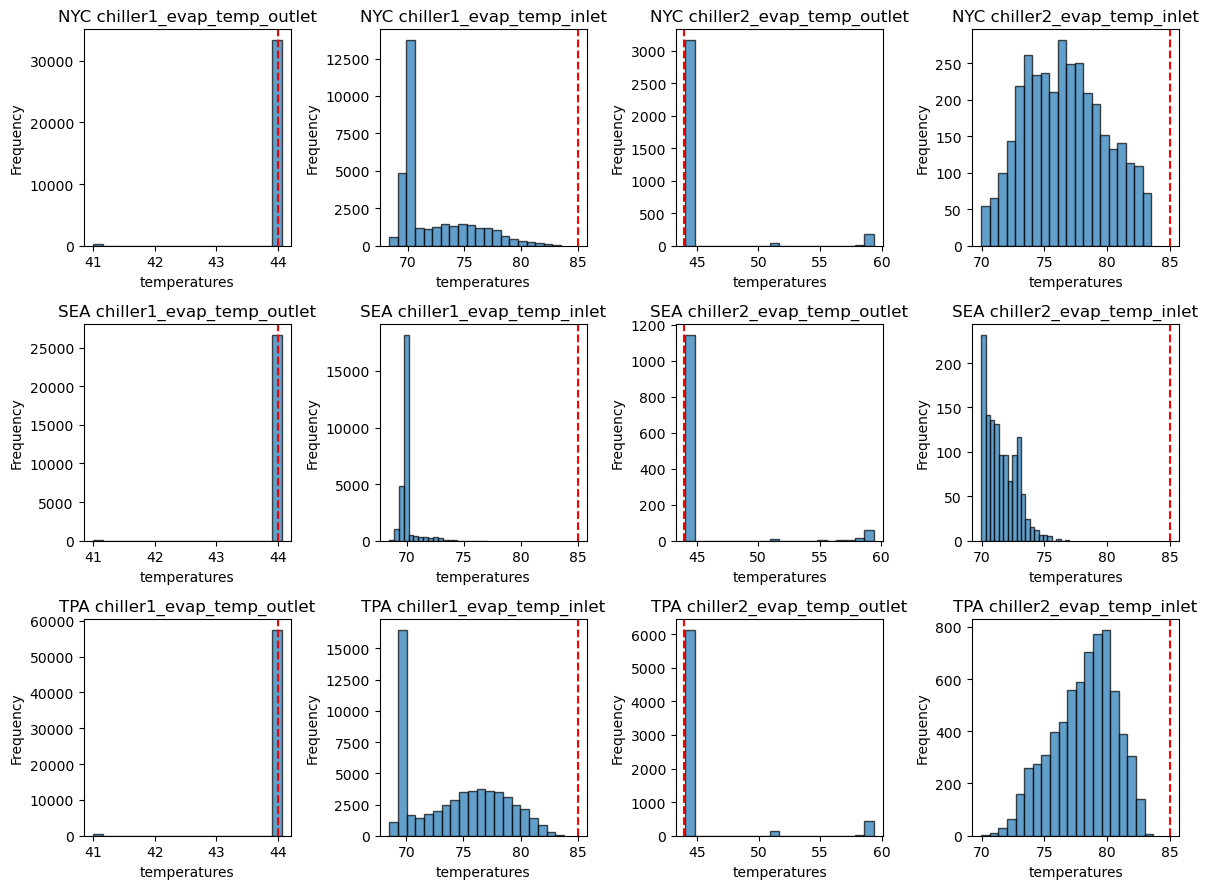

In [16]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    for j, chiller in enumerate(chillers):
        cols = [chiller+'_evap_temp_outlet', chiller+'_evap_temp_inlet']
        filter_col = chiller+'_mass_flow_rate'
        for k, col in enumerate(cols):
            ax = axes[i, j * 2 + k]  # Adjust indexing to access the correct subplot
            draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# OfficeSmall

In [17]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_OfficeSmall_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_OfficeSmall_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_OfficeSmall_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'outdoor_air_drybulb_temp','outdoor_air_wetbulb_temp','chiller_evap_temp_outlet', 'chiller_mass_flow_rate','chiller_evap_temp_inlet',
                 'cooling_coil_sys_drybulb_temp', 'cooling_coil_sys_wetbulb_temp']
    selected_columns = [col for col in dfs[i].columns if col.endswith('let')]
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)

In [20]:
cols = []
filter_cols = []
cols.append('chiller_evap_temp_outlet')
cols.append('chiller_evap_temp_inlet')
std_temp = [6.7, 21]
filter_cols.append('chiller_mass_flow_rate')

num_plots = 2 * len(dfs)
num_cols = 2
num_rows = len(dfs)
chillers = ['chiller']
sites = ['New York City','Seattle','Tampa']
std_temp = [44,85]

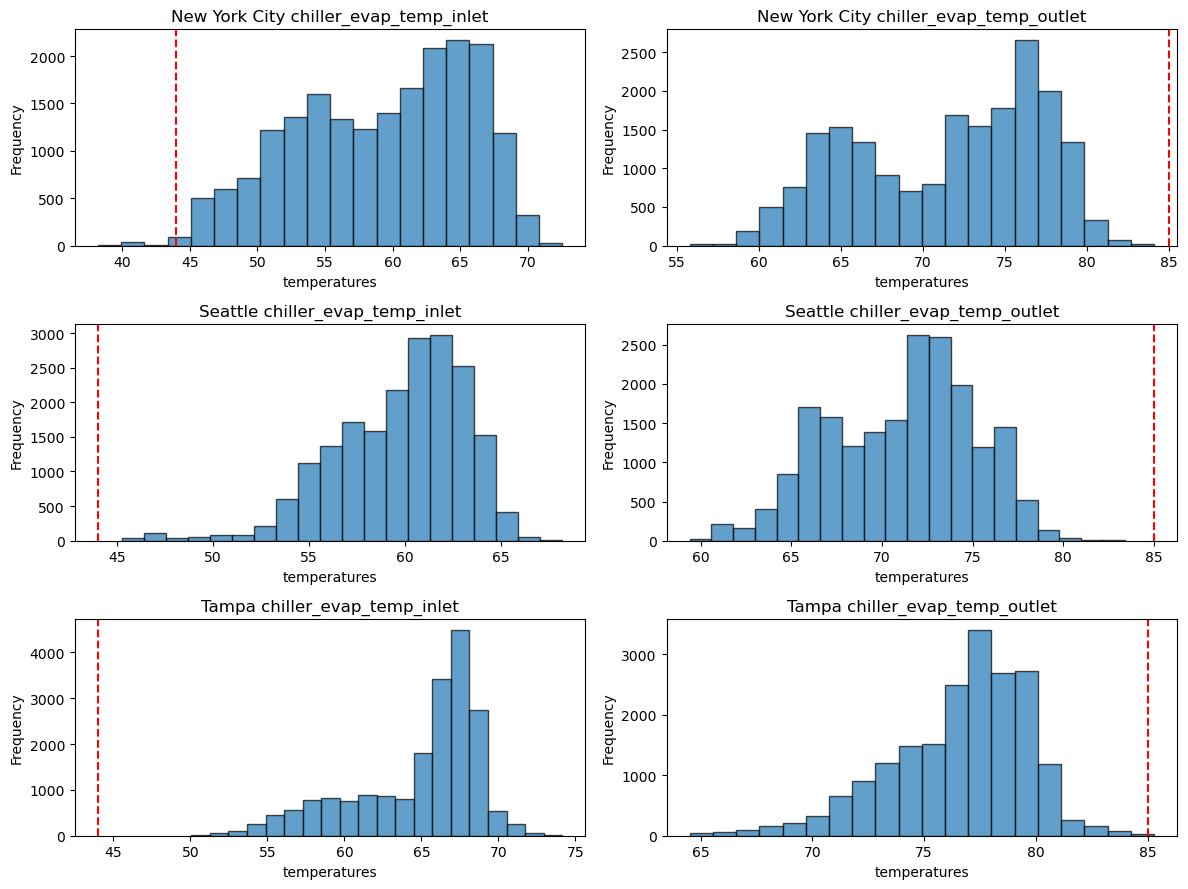

In [21]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    for j, chiller in enumerate(chillers):
        cols = [chiller+'_evap_temp_inlet', chiller+'_evap_temp_outlet']
        filter_col = chiller+'_mass_flow_rate'
        for k, col in enumerate(cols):
            ax = axes[i, j * 2 + k]  # Adjust indexing to access the correct subplot
            draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()